In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,15),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

from timeit import default_timer as timer
import math
from decimal import Decimal

from igraph import *
import networkx as nx

<h2>Helper functions:</h2>


In [3]:
#The wrapper time accepts callback functions with arguments (in tuple), performs callback and measures the time of execution.
#It returns tuple of callback result and time of callback execution.
def time(func,*args):
    start=timer()

    res=func(*args)

    end=timer()
    return (res,end-start)

In [4]:
#Function to generate a random adjacency matrix for a simple undirected weighted graph of 
#v vertices and e edges with assigned random positive integer weights.
def genAdj(v,e,deb=False):

    #Random connected (if possibble) graph based on the Erdos-Renyi model
    g=Graph.Erdos_Renyi(n=v,m=e)
    summary(g)

    #get non-weighted adj
    adj=np.array(g.get_adjacency().data)

    randomVV=np.random.randint(1,100,[v,v])
    simRandomVV=np.maximum(randomVV,randomVV.transpose())
    #plot a graph if deb = true
    if(deb):
        printGraph(g)
        
    #return wheighted adj by element-wise mul
    return np.multiply(simRandomVV,adj)

#Function to check is graph connected or not and transform it to connected if needed
def toConnectedGraph(adj):
    #for any V > 10
    V=len(g)

    for i in range(V):
        onlyZeros=not np.any(adj[i])
        if(onlyZeros):
            numbers = list(range(0, V))
            numbers.remove(i)
            j=np.random.choice(numbers)

            w=np.random.randint(1,100)
            adj[i][j]=w
            adj[j][i]=w

    #It isn't necessary to use return
    return adj

def printGraph(g):
    layout = g.layout("kk")
    fig, ax = plt.subplots()
    plot(g, layout=layout, target=ax)

In [26]:
#Implementation of dijkstra's alg using adjacency matrix.
#Actually, it is implemented here only to test Floyd-Warshall alg
#from https://www.algorithms-and-technologies.com/dijkstra/python
def dijkstra(g, start):
    """
    :param graph: an adjacency-matrix-representation of the graph where (x,y) is the weight of the edge or 0 if there is no edge.
    :param start: the node to start from.
    :return: an array containing the shortest distances from the given start node to each other node
    """
    # This contains the distances from the start node to all other nodes
    distances = [float("inf") for _ in range(len(g))]
    # This contains whether a node was already visited
    visited = [False for _ in range(len(g))]
    # The distance from the start node to itself is of course 0
    distances[start] = 0
    # While there are nodes left to visit...
    while True:
        # ... find the node with the currently shortest distance from the start node...
        shortest_distance = float("inf")
        shortest_index = -1
        for i in range(len(g)):
            # ... by going through all nodes that haven't been visited yet
            if distances[i] < shortest_distance and not visited[i]:
                shortest_distance = distances[i]
                shortest_index = i

        if shortest_index == -1:
            # There was no node not yet visited --> We are done
            return distances

        # ...then, for all neighboring nodes that haven't been visited yet....
        for i in range(len(g[shortest_index])):
            # ...if the path over this edge is shorter...
            if g[shortest_index][i] != 0 and distances[i] > distances[shortest_index] + g[shortest_index][i]:
                # ...Save this path as new shortest path.
                distances[i] = distances[shortest_index] + g[shortest_index][i]

        # Lastly, note that we are finished with this node.
        visited[shortest_index] = True
        # print("Visited nodes: " + str(visited))
        # print("Currently lowest distances: " + str(distances))

In [27]:
#Implementation of Floyd-Warshall alg using adjacency matrix.
def FloydWarshall(g,start):
    V=len(g)
    # We will initialize 2D-array of distances as Infinities
    dist = [ [np.Inf] * V for _ in range(V)]
    # We will assign weights of edges to distaces 2D-array and assign distance from vertix to itself as 0
    for i in range(V):
        for j in range(V):
            if (g[i][j]!=0):
                dist[i][j]=(g[i][j])

    for i in range(V):
        dist[i][i]=0

    for k in range(V):
        for i in range(V):
            for j in range(V):
                #If we find shorter way between verices, just update it
                    if dist[i][j] > dist[i][k] + dist[k][j]:
                        dist[i][j] = dist[i][k] + dist[k][j]
    #So, we can return paths for "start" vertix
    return dist[start]

IGRAPH U--- 10 9 -- 
k.ecount:  10
[ 0  0  0 74  0 46  0  0  0 63]
[ 0  0  0  0  0  0  0  0 84  0]
[ 0  0  0 97 89  0 89  0  0  0]
[74  0 97  0  0  0  0  0 95  0]
[ 0  0 89  0  0  0  0  0  0  0]
[46  0  0  0  0  0 19  0  0  0]
[ 0  0 89  0  0 19  0  0  0  0]
[ 0  0  0  0  0  0  0  0 96  0]
[ 0 84  0 95  0  0  0 96  0  0]
[63  0  0  0  0  0  0  0  0  0]
dijkstra:  [0, 253, 154, 74, 243, 46, 65, 265, 169, 63]
BellmanFord:  [0, 253, 154, 74, 243, 46, 65, 265, 169, 63]


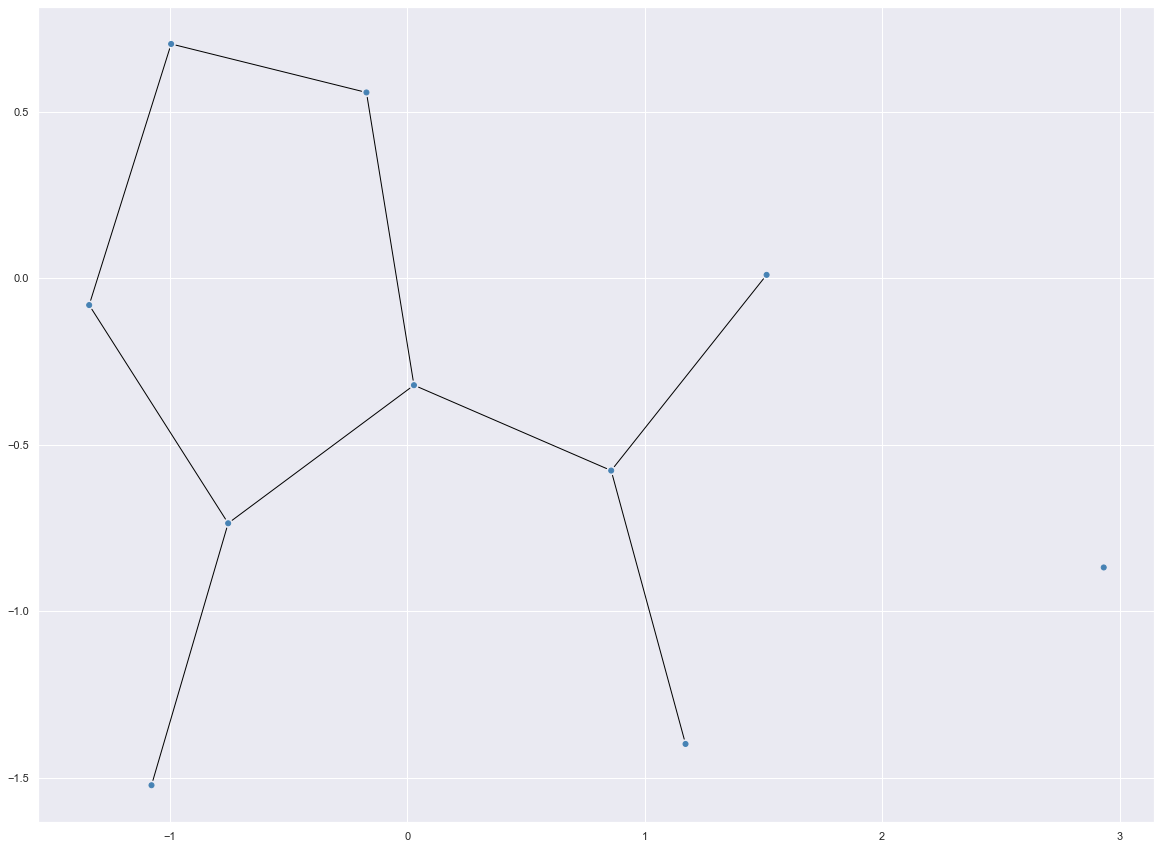

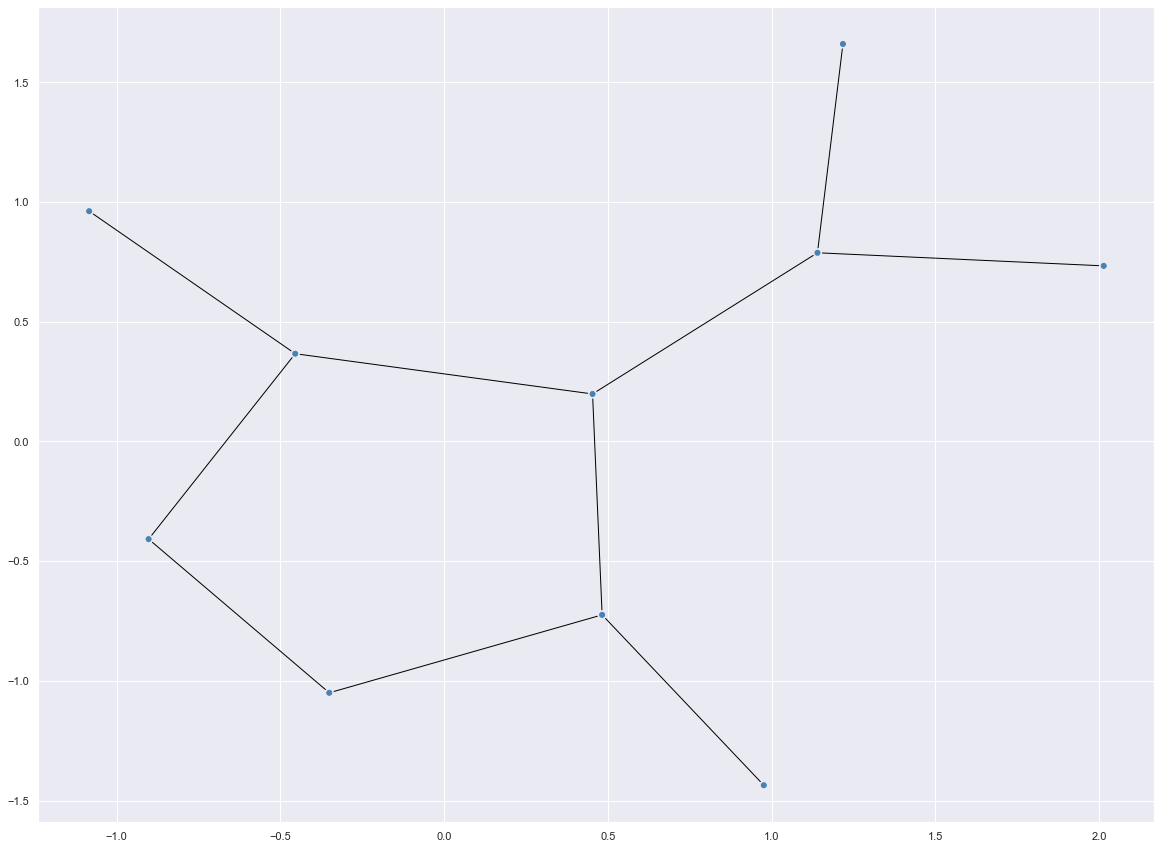

In [28]:
#debug cell, can be skipped
g=genAdj(10,9,True)

g=toConnectedGraph(g)


k=Graph.Adjacency((g>0).tolist(),mode="undirected")
print("k.ecount: ",k.ecount())
printGraph(k)
for i in range(len(g)):
    print(g[i])

print("dijkstra: ",dijkstra(g,0))

print("BellmanFord: ", FloydWarshall(g,0))


Final dataframe will include the next features:
* name - name of operation to investigate
* inpAdj - input adjacency matrix for debug
* inpStart - input starting vertex for debug
* res - result of operation for debug
* time_measured - execution time of operation in seconds

In [29]:
#if you already have computed csv, turn "useCsv" flag to True value and just skip code below in this cell
useCsv=False
temp_data=[]
for V in range(100,301):
    #the fixed number of edges, significantly more than V (so total E should be in interval (E+0.5V)+-0.5V ~ E)
    E=2500
    if(not useCsv):
        #every data instance (a single measurment of execution time) will be added as a dictionary with
        #features listed above to list temp_data

        #repeat every alg 10 times for single random graph and choosen vertex
        g=genAdj(V,E,False)
        toConnectedGraph(g)
        #for i in range(0,100):
            #print(g[i])
        st=np.random.randint(0,99)
        for i in range(3):
            #FW
            res_time=time(FloydWarshall,g,st)
            temp_data.append({"name":"FloydWarshallFixedE","V":V,"E":E,"inpAdj":g,"inpStart":st,"res":res_time[0],"time_measured":res_time[1]})


IGRAPH U--- 100 2500 -- 
IGRAPH U--- 101 2500 -- 
IGRAPH U--- 102 2500 -- 
IGRAPH U--- 103 2500 -- 
IGRAPH U--- 104 2500 -- 
IGRAPH U--- 105 2500 -- 
IGRAPH U--- 106 2500 -- 
IGRAPH U--- 107 2500 -- 
IGRAPH U--- 108 2500 -- 
IGRAPH U--- 109 2500 -- 
IGRAPH U--- 110 2500 -- 
IGRAPH U--- 111 2500 -- 
IGRAPH U--- 112 2500 -- 
IGRAPH U--- 113 2500 -- 
IGRAPH U--- 114 2500 -- 
IGRAPH U--- 115 2500 -- 
IGRAPH U--- 116 2500 -- 
IGRAPH U--- 117 2500 -- 
IGRAPH U--- 118 2500 -- 
IGRAPH U--- 119 2500 -- 
IGRAPH U--- 120 2500 -- 
IGRAPH U--- 121 2500 -- 
IGRAPH U--- 122 2500 -- 
IGRAPH U--- 123 2500 -- 
IGRAPH U--- 124 2500 -- 
IGRAPH U--- 125 2500 -- 
IGRAPH U--- 126 2500 -- 
IGRAPH U--- 127 2500 -- 
IGRAPH U--- 128 2500 -- 
IGRAPH U--- 129 2500 -- 
IGRAPH U--- 130 2500 -- 
IGRAPH U--- 131 2500 -- 
IGRAPH U--- 132 2500 -- 
IGRAPH U--- 133 2500 -- 
IGRAPH U--- 134 2500 -- 
IGRAPH U--- 135 2500 -- 
IGRAPH U--- 136 2500 -- 
IGRAPH U--- 137 2500 -- 
IGRAPH U--- 138 2500 -- 
IGRAPH U--- 139 2500 -- 


In [30]:
df_final1=pd.DataFrame()

if(useCsv):
    #write path to csv file instead of "df_final"
    df_final1=pd.read_csv("FWFixedE.csv",index_col=0)
else:
    #Convert the list of dictionaries to the dataframe:
    df_final1 = pd.DataFrame.from_dict(temp_data)
    #df_final1.to_csv("FWFixedE.csv")

df_final1

,name,V,E,inpAdj,inpStart,res,time_measured
0,FloydWarshallFixedE,100,2500,"[[0, 65, 0, 0, 9, 0, 79, 0, 70, 0, 92, 0, 0, 6...",38,"[65, 60, 81, 51, 74, 51, 65, 86, 71, 63, 88, 7...",0.297530
1,FloydWarshallFixedE,100,2500,"[[0, 65, 0, 0, 9, 0, 79, 0, 70, 0, 92, 0, 0, 6...",38,"[65, 60, 81, 51, 74, 51, 65, 86, 71, 63, 88, 7...",0.266058
2,FloydWarshallFixedE,100,2500,"[[0, 65, 0, 0, 9, 0, 79, 0, 70, 0, 92, 0, 0, 6...",38,"[65, 60, 81, 51, 74, 51, 65, 86, 71, 63, 88, 7...",0.259052
3,FloydWarshallFixedE,101,2500,"[[0, 84, 45, 95, 0, 90, 31, 73, 0, 0, 0, 0, 0,...",84,"[69, 78, 52, 40, 27, 68, 77, 56, 43, 43, 77, 5...",0.238412
4,FloydWarshallFixedE,101,2500,"[[0, 84, 45, 95, 0, 90, 31, 73, 0, 0, 0, 0, 0,...",84,"[69, 78, 52, 40, 27, 68, 77, 56, 43, 43, 77, 5...",0.237047
...,...,...,...,...,...,...,...
598,FloydWarshallFixedE,299,2500,"[[0, 0, 0, 0, 0, 0, 52, 0, 0, 0, 0, 0, 0, 0, 0...",85,"[103, 37, 98, 110, 80, 16, 82, 113, 130, 114, ...",7.960423
599,FloydWarshallFixedE,299,2500,"[[0, 0, 0, 0, 0, 0, 52, 0, 0, 0, 0, 0, 0, 0, 0...",85,"[103, 37, 98, 110, 80, 16, 82, 113, 130, 114, ...",7.982300
600,FloydWarshallFixedE,300,2500,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 64...",46,"[137, 139, 96, 135, 142, 142, 89, 154, 87, 119...",8.130593
601,FloydWarshallFixedE,300,2500,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 64...",46,"[137, 139, 96, 135, 142, 142, 89, 154, 87, 119...",8.195786


In [31]:
#if you already have computed csv, turn "useCsv" flag to True value and just skip code below in this cell
useCsv=False
temp_data=[]
#Max number of E (no loops) in orgraph is V(V-1)/2, for V=100 it is 4950
for E in range(500,1000):
    #the fixed number of vertices
    V=100
    if(not useCsv):
        #every data instance (a single measurment of execution time) will be added as a dictionary with
        #features listed above to list temp_data

        #repeat every alg 10 times for single random graph and choosen vertex
        g=genAdj(V,E,False)
        toConnectedGraph(g)
        #for i in range(0,100):
            #print(g[i])
        st=np.random.randint(0,99)
        for i in range(3):
            #FW
            res_time=time(FloydWarshall,g,st)
            temp_data.append({"name":"FloydWarshallFixedV","V":V,"E":E,"inpAdj":g,"inpStart":st,"res":res_time[0],"time_measured":res_time[1]})

IGRAPH U--- 100 500 -- 
IGRAPH U--- 100 501 -- 
IGRAPH U--- 100 502 -- 
IGRAPH U--- 100 503 -- 
IGRAPH U--- 100 504 -- 
IGRAPH U--- 100 505 -- 
IGRAPH U--- 100 506 -- 
IGRAPH U--- 100 507 -- 
IGRAPH U--- 100 508 -- 
IGRAPH U--- 100 509 -- 
IGRAPH U--- 100 510 -- 
IGRAPH U--- 100 511 -- 
IGRAPH U--- 100 512 -- 
IGRAPH U--- 100 513 -- 
IGRAPH U--- 100 514 -- 
IGRAPH U--- 100 515 -- 
IGRAPH U--- 100 516 -- 
IGRAPH U--- 100 517 -- 
IGRAPH U--- 100 518 -- 
IGRAPH U--- 100 519 -- 
IGRAPH U--- 100 520 -- 
IGRAPH U--- 100 521 -- 
IGRAPH U--- 100 522 -- 
IGRAPH U--- 100 523 -- 
IGRAPH U--- 100 524 -- 
IGRAPH U--- 100 525 -- 
IGRAPH U--- 100 526 -- 
IGRAPH U--- 100 527 -- 
IGRAPH U--- 100 528 -- 
IGRAPH U--- 100 529 -- 
IGRAPH U--- 100 530 -- 
IGRAPH U--- 100 531 -- 
IGRAPH U--- 100 532 -- 
IGRAPH U--- 100 533 -- 
IGRAPH U--- 100 534 -- 
IGRAPH U--- 100 535 -- 
IGRAPH U--- 100 536 -- 
IGRAPH U--- 100 537 -- 
IGRAPH U--- 100 538 -- 
IGRAPH U--- 100 539 -- 
IGRAPH U--- 100 540 -- 
IGRAPH U--- 100 

In [32]:
df_final2=pd.DataFrame()

if(useCsv):
    #write path to csv file instead of "df_final"
    df_final2=pd.read_csv("FWFixedV.csv",index_col=0)
else:
    #Convert the list of dictionaries to dataframe:
    df_final2 = pd.DataFrame.from_dict(temp_data)
    #df_final2.to_csv("FWFixedV.csv")

df_final2

,name,V,E,inpAdj,inpStart,res,time_measured
0,FloydWarshallFixedV,100,500,"[[0, 0, 0, 0, 0, 0, 0, 61, 0, 0, 0, 0, 0, 0, 0...",80,"[82, 90, 99, 103, 53, 123, 68, 21, 167, 76, 16...",0.420190
1,FloydWarshallFixedV,100,500,"[[0, 0, 0, 0, 0, 0, 0, 61, 0, 0, 0, 0, 0, 0, 0...",80,"[82, 90, 99, 103, 53, 123, 68, 21, 167, 76, 16...",0.415968
2,FloydWarshallFixedV,100,500,"[[0, 0, 0, 0, 0, 0, 0, 61, 0, 0, 0, 0, 0, 0, 0...",80,"[82, 90, 99, 103, 53, 123, 68, 21, 167, 76, 16...",0.425437
3,FloydWarshallFixedV,100,501,"[[0, 0, 96, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0,"[0, 154, 86, 125, 101, 122, 110, 109, 116, 70,...",0.442715
4,FloydWarshallFixedV,100,501,"[[0, 0, 96, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0,"[0, 154, 86, 125, 101, 122, 110, 109, 116, 70,...",0.445276
...,...,...,...,...,...,...,...
1495,FloydWarshallFixedV,100,998,"[[0, 82, 88, 0, 71, 0, 7, 0, 0, 0, 87, 0, 0, 8...",78,"[72, 101, 82, 68, 78, 75, 65, 102, 93, 62, 99,...",0.295305
1496,FloydWarshallFixedV,100,998,"[[0, 82, 88, 0, 71, 0, 7, 0, 0, 0, 87, 0, 0, 8...",78,"[72, 101, 82, 68, 78, 75, 65, 102, 93, 62, 99,...",0.283476
1497,FloydWarshallFixedV,100,999,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 96, 0, 0, 72, 0, ...",14,"[94, 72, 100, 120, 95, 97, 92, 104, 59, 109, 1...",0.311827
1498,FloydWarshallFixedV,100,999,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 96, 0, 0, 72, 0, ...",14,"[94, 72, 100, 120, 95, 97, 92, 104, 59, 109, 1...",0.314163


In [5]:
#Implementation of Kruskal alg using edges set.
#https://gist.github.com/Peng-YM/84bd4b3f6ddcb75a147182e6bdf281a6
def kruskal(g,edges):
    V=len(g)
    # initialize MST
    MST = set()
    # sort all edges in graph G by weights from smallest to largest
    sorted_edges = sorted(edges, key=lambda e:g[e[0]][e[1]])
    uf = UF(V)
    for e in sorted_edges:
        u, v = e
        # if u, v already connected, abort this edge
        if uf.connected(u, v):
            continue
        # if not, connect them and add this edge to the MST
        uf.union(u, v)
        MST.add(e)

    return MST

#class to check are verices already connected, to prevent loops
class UF:
    def __init__(self, N):
        self._id = [i for i in range(N)]

    # judge two node connected or not
    def connected(self, p, q):
        return self._find(p) == self._find(q)

    # quick union two component
    def union(self, p, q):
        p_root = self._find(p)
        q_root = self._find(q)
        if p_root == q_root:
            return
        self._id[p_root] = q_root

    # find the root of p
    def _find(self, p):
        while p != self._id[p]:
            p = self._id[p]
        return p
        
def AdjToEdges(adj):
    V=len(g)
    edges = set()
    # collect all edges from graph G
    for j in range(V):
        for k in range(V):
            if g[j][k] != 0 and (k, j) not in edges:
                edges.add((j, k))
    return edges

IGRAPH U--- 5 9 -- 
[ 0 45 74 22  0]
[45  0 89 72 74]
[74 89  0 19 93]
[22 72 19  0 51]
[ 0 74 93 51  0]


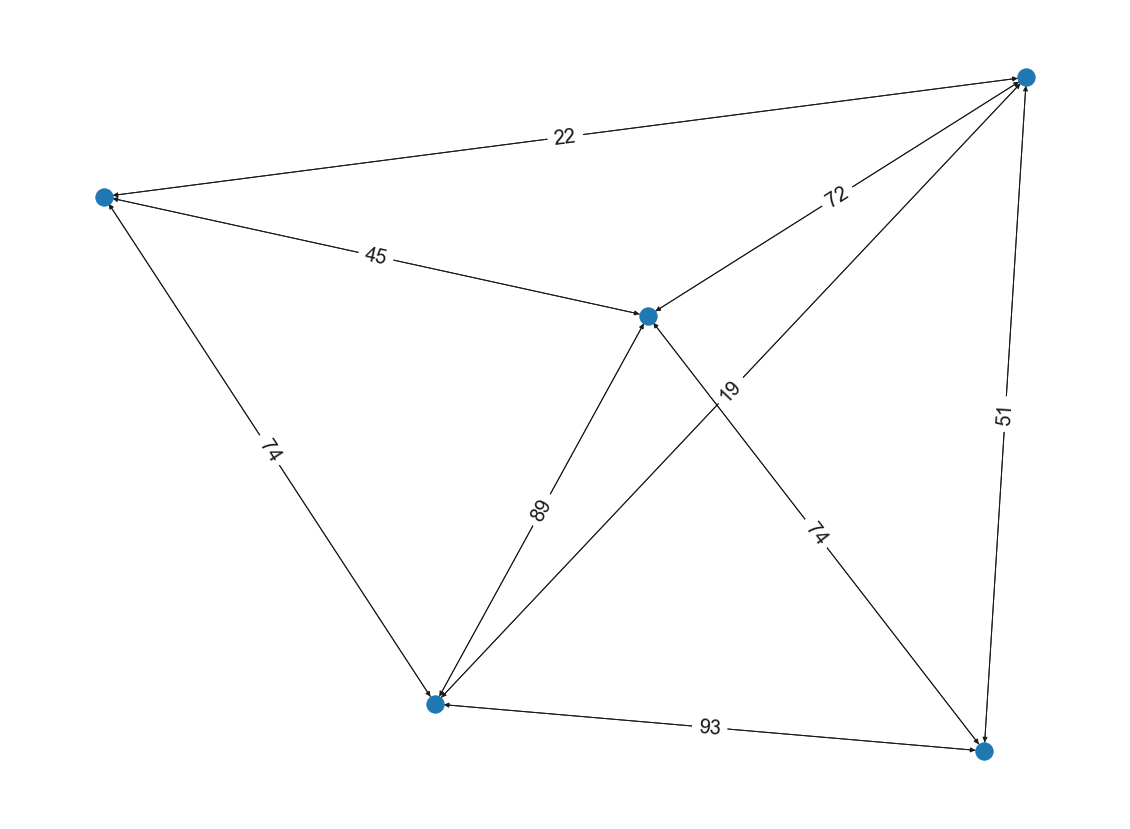

Kruskal:  {(2, 3), (0, 3), (3, 4), (0, 1)}


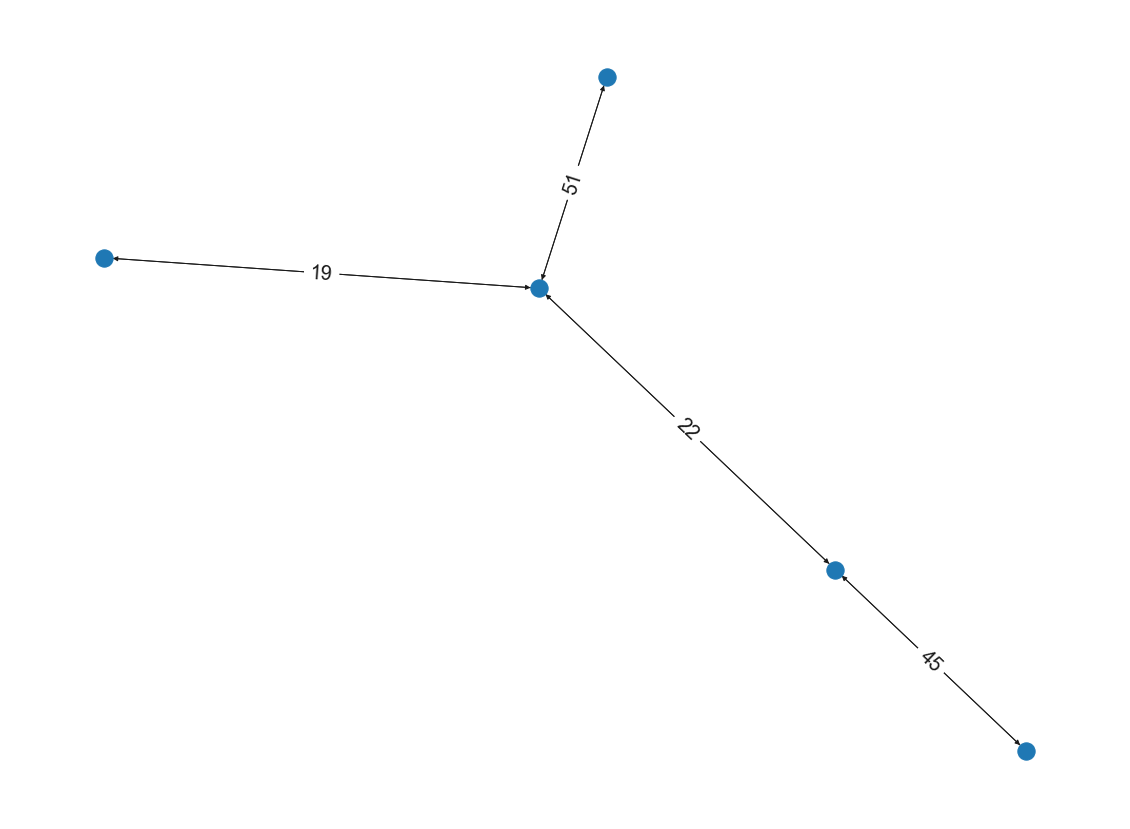

In [89]:
#debug cell to check does spanning tree have minimum weight or not, can be skipped
#plot mini-graph and check is founded tree is mst or not
g=genAdj(5,9,False)
for i in range(0,5):
    print(g[i])

#We will use nx only for plot weighted graph
fig, ax = plt.subplots()

G = nx.from_numpy_matrix(g, create_using=nx.DiGraph)
layout = nx.spring_layout(G)
nx.draw(G, layout)
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels,ax=ax,font_size=20)
plt.show()

mst=kruskal(g,AdjToEdges(g))
print("Kruskal: ", mst)

mst_g=Graph()
mst_g.add_vertices(5)
mst_g.add_edges(mst)

#adj matrix
mst_adj=np.array(mst_g.get_adjacency().data)

#weighted
mst_adj_w=np.multiply(mst_adj,g)


#We will use nx only for plot weighted graph
fig, ax = plt.subplots()

G = nx.from_numpy_matrix(mst_adj_w, create_using=nx.DiGraph)
layout = nx.spring_layout(G)
nx.draw(G, layout)
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels,ax=ax,font_size=20)
plt.show()


IGRAPH U--- 100 500 -- 
Kruskal:  {(24, 42), (25, 96), (12, 25), (18, 65), (13, 81), (46, 50), (64, 98), (28, 78), (5, 21), (3, 33), (74, 84), (96, 99), (10, 93), (1, 90), (18, 21), (73, 76), (9, 49), (22, 30), (66, 73), (60, 87), (85, 86), (21, 50), (90, 94), (31, 81), (77, 78), (43, 55), (15, 48), (57, 63), (42, 93), (58, 67), (20, 92), (9, 71), (13, 53), (77, 89), (33, 83), (1, 78), (17, 32), (33, 37), (62, 91), (21, 93), (41, 71), (70, 86), (20, 60), (40, 72), (48, 85), (15, 91), (15, 45), (13, 57), (1, 73), (79, 84), (25, 92), (61, 78), (36, 88), (50, 87), (44, 80), (2, 74), (0, 22), (51, 88), (71, 82), (21, 81), (13, 43), (4, 74), (60, 72), (36, 81), (10, 16), (11, 79), (37, 52), (81, 97), (6, 39), (44, 75), (17, 33), (32, 88), (58, 61), (47, 67), (59, 69), (55, 80), (7, 95), (24, 56), (8, 69), (30, 78), (27, 91), (15, 74), (6, 71), (26, 74), (32, 35), (23, 57), (33, 34), (1, 29), (35, 95), (25, 39), (10, 59), (14, 20), (19, 71), (16, 54), (40, 48), (38, 60), (85, 89), (68, 82), 

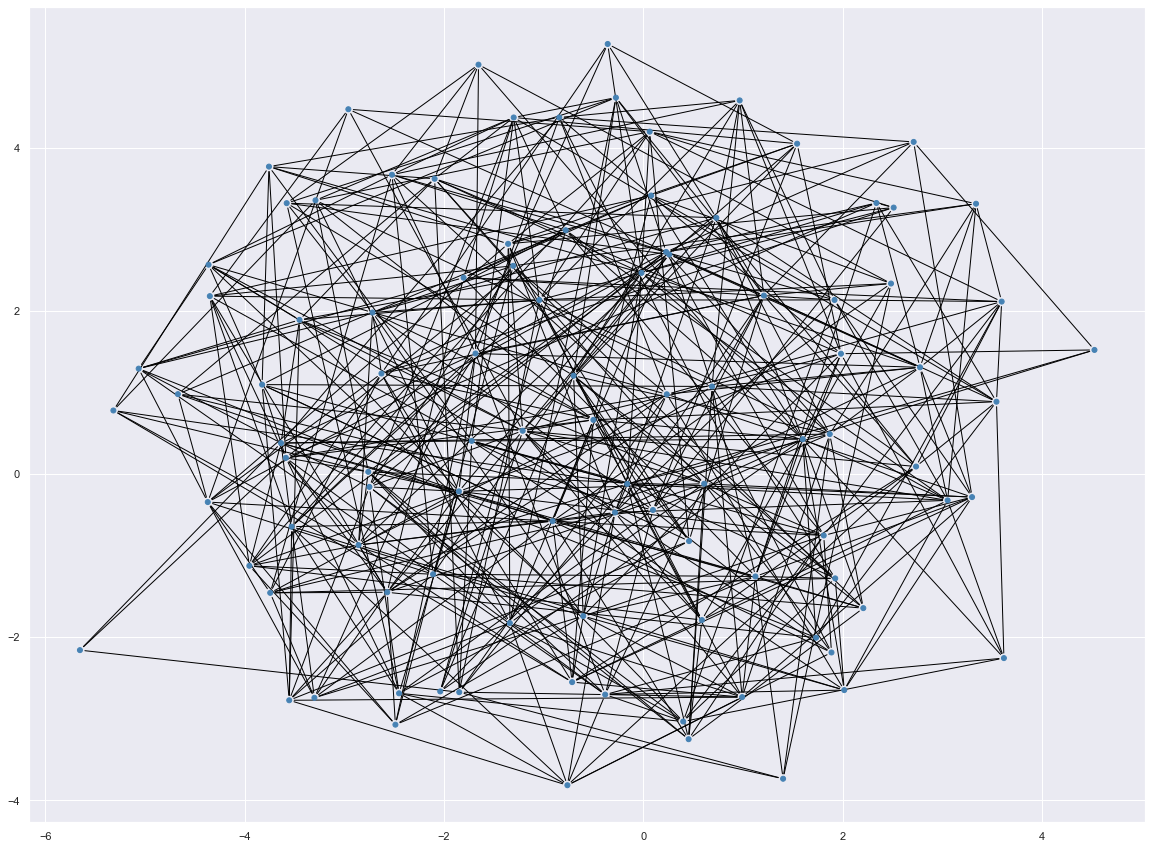

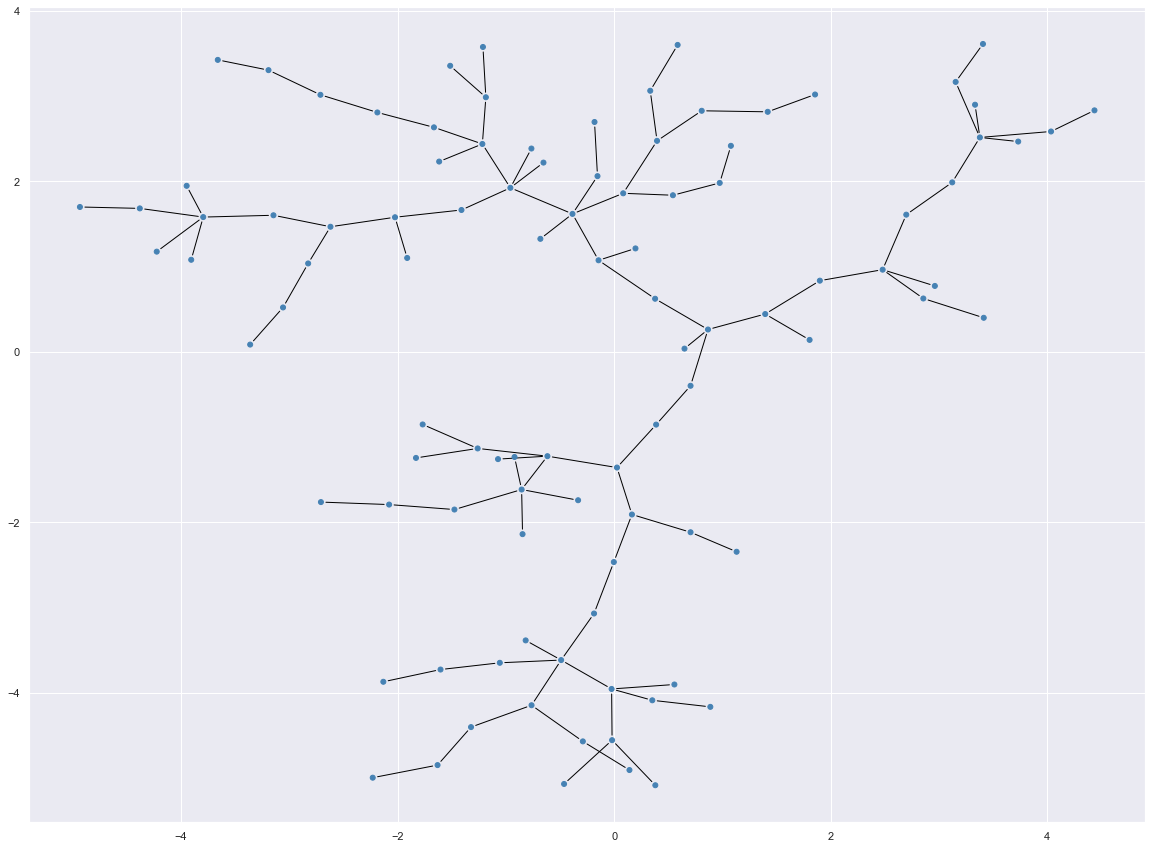

In [90]:
#debug cell, can be skipped
g=genAdj(100,500,True)
#for i in range(0,100):
    #print(g[i])
g=toConnectedGraph(g)

mst=kruskal(g,AdjToEdges(g))
print("Kruskal: ", mst)

mst_g=Graph()
mst_g.add_vertices(100)
mst_g.add_edges(mst)

layout = mst_g.layout("kk")
fig, ax = plt.subplots()
plot(mst_g, layout=layout, target=ax)



In [112]:
#if you already have computed csv, turn "useCsv" flag to True value and just skip code below in this cell
useCsv=False
temp_data=[]
#Max number of E (no loops) in orgraph is V(V-1)/2, for V=100 it is 4950
for E in range(500,15000):
    #the fixed number of vertices
    V=300
    if(not useCsv):
        #every data instance (a single measurment of execution time) will be added as a dictionary with
        #features listed above to list temp_data

        #repeat every alg 10 times for single random graph and choosen vertex
        g=genAdj(V,E,False)
        toConnectedGraph(g)
        #We will cacluclate it separately to avoid additional V^2 time complexity
        edges=AdjToEdges(g)
        #for i in range(0,100):
            #print(g[i])
        for i in range(3):
            #FW
            res_time=time(kruskal,g,edges)
            temp_data.append({"name":"KruskalFixedV","V":V,"E":E,"inpAdj":g,"res":res_time[0],"time_measured":res_time[1]})

IGRAPH U--- 300 500 -- 
IGRAPH U--- 300 501 -- 
IGRAPH U--- 300 502 -- 
IGRAPH U--- 300 503 -- 
IGRAPH U--- 300 504 -- 
IGRAPH U--- 300 505 -- 
IGRAPH U--- 300 506 -- 
IGRAPH U--- 300 507 -- 
IGRAPH U--- 300 508 -- 
IGRAPH U--- 300 509 -- 
IGRAPH U--- 300 510 -- 
IGRAPH U--- 300 511 -- 
IGRAPH U--- 300 512 -- 
IGRAPH U--- 300 513 -- 
IGRAPH U--- 300 514 -- 
IGRAPH U--- 300 515 -- 
IGRAPH U--- 300 516 -- 
IGRAPH U--- 300 517 -- 
IGRAPH U--- 300 518 -- 
IGRAPH U--- 300 519 -- 
IGRAPH U--- 300 520 -- 
IGRAPH U--- 300 521 -- 
IGRAPH U--- 300 522 -- 
IGRAPH U--- 300 523 -- 
IGRAPH U--- 300 524 -- 
IGRAPH U--- 300 525 -- 
IGRAPH U--- 300 526 -- 
IGRAPH U--- 300 527 -- 
IGRAPH U--- 300 528 -- 
IGRAPH U--- 300 529 -- 
IGRAPH U--- 300 530 -- 
IGRAPH U--- 300 531 -- 
IGRAPH U--- 300 532 -- 
IGRAPH U--- 300 533 -- 
IGRAPH U--- 300 534 -- 
IGRAPH U--- 300 535 -- 
IGRAPH U--- 300 536 -- 
IGRAPH U--- 300 537 -- 
IGRAPH U--- 300 538 -- 
IGRAPH U--- 300 539 -- 
IGRAPH U--- 300 540 -- 
IGRAPH U--- 300 

In [114]:
df_final3=pd.DataFrame()

if(useCsv):
    #write path to csv file instead of "df_final"
    df_final3=pd.read_csv("KraskalFixedV.csv",index_col=0)
else:
    #Convert the list of dictionaries to the dataframe:
    df_final3 = pd.DataFrame.from_dict(temp_data)
    #df_final3.to_csv("KraskalFixedV.csv")

df_final3

,name,V,E,inpAdj,res,time_measured
0,KruskalFixedV,300,500,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","{(168, 233), (115, 197), (149, 165), (143, 188...",0.002619
1,KruskalFixedV,300,500,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","{(168, 233), (115, 197), (149, 165), (143, 188...",0.002794
2,KruskalFixedV,300,500,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","{(168, 233), (115, 197), (149, 165), (143, 188...",0.002673
3,KruskalFixedV,300,501,"[[0, 0, 0, 0, 86, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","{(223, 288), (246, 290), (95, 249), (61, 162),...",0.002355
4,KruskalFixedV,300,501,"[[0, 0, 0, 0, 86, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","{(223, 288), (246, 290), (95, 249), (61, 162),...",0.002431
...,...,...,...,...,...,...
43495,KruskalFixedV,300,14998,"[[0, 77, 0, 0, 64, 0, 0, 0, 59, 0, 0, 75, 0, 0...","{(14, 175), (59, 110), (189, 265), (158, 177),...",0.114092
43496,KruskalFixedV,300,14998,"[[0, 77, 0, 0, 64, 0, 0, 0, 59, 0, 0, 75, 0, 0...","{(14, 175), (59, 110), (189, 265), (158, 177),...",0.111772
43497,KruskalFixedV,300,14999,"[[0, 0, 0, 0, 0, 0, 0, 0, 56, 39, 0, 0, 0, 0, ...","{(11, 158), (77, 124), (77, 197), (66, 231), (...",0.115315
43498,KruskalFixedV,300,14999,"[[0, 0, 0, 0, 0, 0, 0, 0, 56, 39, 0, 0, 0, 0, ...","{(11, 158), (77, 124), (77, 197), (66, 231), (...",0.115909


In [6]:
#if you already have computed csv, turn "useCsv" flag to True value and just skip code below in this cell
useCsv=False
temp_data=[]
for V in range(100,3000):
    #the fixed number of edges, significantly more than V (so total E should be in interval (E+0.5V)+-0.5V ~ E)
    E=4500
    if(not useCsv):
        #every data instance (a single measurment of execution time) will be added as a dictionary with
        #features listed above to list temp_data

        #repeat every alg 10 times for single random graph and choosen vertex
        g=genAdj(V,E,False)
        toConnectedGraph(g)

        #We will cacluclate it separately to avoid additional V^2 time complexity
        edges=AdjToEdges(g)
        #for i in range(0,100):
            #print(g[i])
        for i in range(3):
            #FW
            res_time=time(kruskal,g,edges)
            temp_data.append({"name":"KruskalFixedE","V":V,"E":E,"inpAdj":g,"res":res_time[0],"time_measured":res_time[1]})

IGRAPH U--- 100 4500 -- 
IGRAPH U--- 101 4500 -- 
IGRAPH U--- 102 4500 -- 
IGRAPH U--- 103 4500 -- 
IGRAPH U--- 104 4500 -- 
IGRAPH U--- 105 4500 -- 
IGRAPH U--- 106 4500 -- 
IGRAPH U--- 107 4500 -- 
IGRAPH U--- 108 4500 -- 
IGRAPH U--- 109 4500 -- 
IGRAPH U--- 110 4500 -- 
IGRAPH U--- 111 4500 -- 
IGRAPH U--- 112 4500 -- 
IGRAPH U--- 113 4500 -- 
IGRAPH U--- 114 4500 -- 
IGRAPH U--- 115 4500 -- 
IGRAPH U--- 116 4500 -- 
IGRAPH U--- 117 4500 -- 
IGRAPH U--- 118 4500 -- 
IGRAPH U--- 119 4500 -- 
IGRAPH U--- 120 4500 -- 
IGRAPH U--- 121 4500 -- 
IGRAPH U--- 122 4500 -- 
IGRAPH U--- 123 4500 -- 
IGRAPH U--- 124 4500 -- 
IGRAPH U--- 125 4500 -- 
IGRAPH U--- 126 4500 -- 
IGRAPH U--- 127 4500 -- 
IGRAPH U--- 128 4500 -- 
IGRAPH U--- 129 4500 -- 
IGRAPH U--- 130 4500 -- 
IGRAPH U--- 131 4500 -- 
IGRAPH U--- 132 4500 -- 
IGRAPH U--- 133 4500 -- 
IGRAPH U--- 134 4500 -- 
IGRAPH U--- 135 4500 -- 
IGRAPH U--- 136 4500 -- 
IGRAPH U--- 137 4500 -- 
IGRAPH U--- 138 4500 -- 
IGRAPH U--- 139 4500 -- 


In [7]:
df_final4=pd.DataFrame()

if(useCsv):
    #write path to csv file instead of "df_final"
    df_final4=pd.read_csv("KraskalFixedE.csv",index_col=0)
else:
    #Convert the list of dictionaries to the dataframe:
    df_final4 = pd.DataFrame.from_dict(temp_data)
    #df_final4.to_csv("KraskalFixedE.csv")

df_final4

,name,V,E,inpAdj,res,time_measured
0,KruskalFixedE,100,4500,"[[0, 18, 58, 72, 72, 99, 45, 99, 86, 91, 47, 4...","{(12, 68), (24, 42), (50, 61), (47, 71), (39, ...",0.020595
1,KruskalFixedE,100,4500,"[[0, 18, 58, 72, 72, 99, 45, 99, 86, 91, 47, 4...","{(12, 68), (24, 42), (50, 61), (47, 71), (39, ...",0.022636
2,KruskalFixedE,100,4500,"[[0, 18, 58, 72, 72, 99, 45, 99, 86, 91, 47, 4...","{(12, 68), (24, 42), (50, 61), (47, 71), (39, ...",0.020564
3,KruskalFixedE,101,4500,"[[0, 0, 0, 95, 76, 59, 49, 57, 0, 99, 29, 16, ...","{(21, 71), (13, 33), (18, 90), (14, 95), (67, ...",0.013120
4,KruskalFixedE,101,4500,"[[0, 0, 0, 95, 76, 59, 49, 57, 0, 99, 29, 16, ...","{(21, 71), (13, 33), (18, 90), (14, 95), (67, ...",0.013942
...,...,...,...,...,...,...
8695,KruskalFixedE,2998,4500,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","{(1718, 2084), (1670, 2273), (684, 781), (609,...",0.123762
8696,KruskalFixedE,2998,4500,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","{(1718, 2084), (1670, 2273), (684, 781), (609,...",0.120189
8697,KruskalFixedE,2999,4500,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","{(64, 1445), (313, 1283), (680, 1305), (805, 1...",0.125806
8698,KruskalFixedE,2999,4500,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","{(64, 1445), (313, 1283), (680, 1305), (805, 1...",0.126132


Data Processing:

In [47]:
procesed1=df_final1.groupby(["name","V","E"],axis=0).aggregate({"time_measured":np.mean}).reset_index()
procesed1.tail(20)

,name,V,E,time_measured
181,FloydWarshallFixedE,281,2500,7.064558
182,FloydWarshallFixedE,282,2500,6.298719
183,FloydWarshallFixedE,283,2500,6.735070
184,FloydWarshallFixedE,284,2500,6.915004
185,FloydWarshallFixedE,285,2500,7.491170
186,FloydWarshallFixedE,286,2500,8.108052
187,FloydWarshallFixedE,287,2500,6.770416
188,FloydWarshallFixedE,288,2500,7.541403
189,FloydWarshallFixedE,289,2500,7.756063
190,FloydWarshallFixedE,290,2500,7.594108


In [59]:
procesed2=df_final2.groupby(["name","V","E"],axis=0).aggregate({"time_measured":np.mean}).reset_index()
procesed2.tail(20)

,name,V,E,time_measured
480,FloydWarshallFixedV,100,980,0.292966
481,FloydWarshallFixedV,100,981,0.314197
482,FloydWarshallFixedV,100,982,0.287489
483,FloydWarshallFixedV,100,983,0.286216
484,FloydWarshallFixedV,100,984,0.303080
485,FloydWarshallFixedV,100,985,0.397231
486,FloydWarshallFixedV,100,986,0.315927
487,FloydWarshallFixedV,100,987,0.348289
488,FloydWarshallFixedV,100,988,0.383478
489,FloydWarshallFixedV,100,989,0.332482


In [117]:
procesed3=df_final3.groupby(["name","V","E"],axis=0).aggregate({"time_measured":np.mean}).reset_index()
procesed3.tail(20)

,name,V,E,time_measured
14480,KruskalFixedV,300,14980,0.118061
14481,KruskalFixedV,300,14981,0.131945
14482,KruskalFixedV,300,14982,0.118836
14483,KruskalFixedV,300,14983,0.124827
14484,KruskalFixedV,300,14984,0.158527
14485,KruskalFixedV,300,14985,0.142796
14486,KruskalFixedV,300,14986,0.134814
14487,KruskalFixedV,300,14987,0.126205
14488,KruskalFixedV,300,14988,0.108833
14489,KruskalFixedV,300,14989,0.122979


In [8]:
procesed4=df_final4.groupby(["name","V","E"],axis=0).aggregate({"time_measured":np.mean}).reset_index()
procesed4.tail(20)

,name,V,E,time_measured
2880,KruskalFixedE,2980,4500,0.136487
2881,KruskalFixedE,2981,4500,0.137105
2882,KruskalFixedE,2982,4500,0.132682
2883,KruskalFixedE,2983,4500,0.160110
2884,KruskalFixedE,2984,4500,0.127238
2885,KruskalFixedE,2985,4500,0.125486
2886,KruskalFixedE,2986,4500,0.130218
2887,KruskalFixedE,2987,4500,0.145313
2888,KruskalFixedE,2988,4500,0.119200
2889,KruskalFixedE,2989,4500,0.216220


<AxesSubplot:xlabel='V', ylabel='time_measured'>

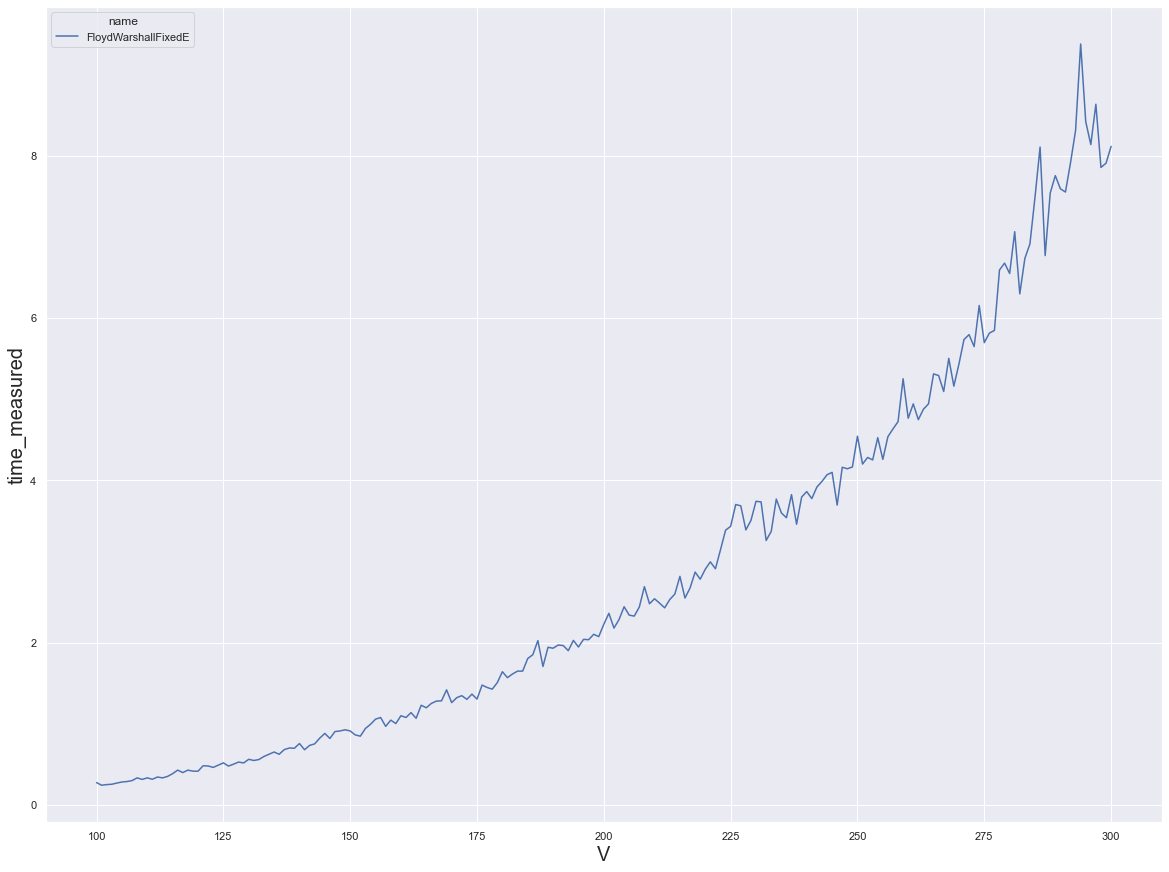

In [106]:
sns.lineplot(x="V",y="time_measured",hue="name",data=procesed1)

<AxesSubplot:xlabel='E', ylabel='time_measured'>

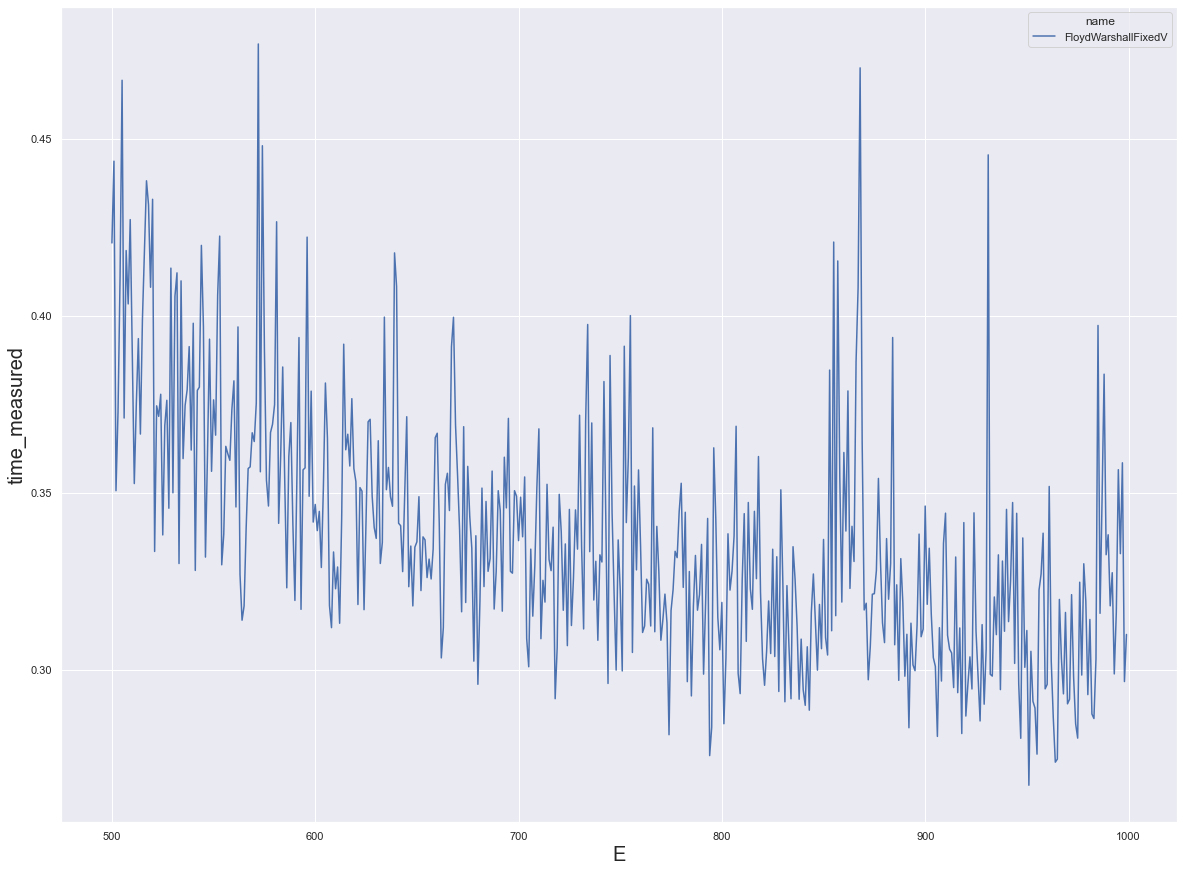

In [62]:
sns.lineplot(x="E",y="time_measured",hue="name",data=procesed2)

<AxesSubplot:xlabel='E', ylabel='time_measured'>

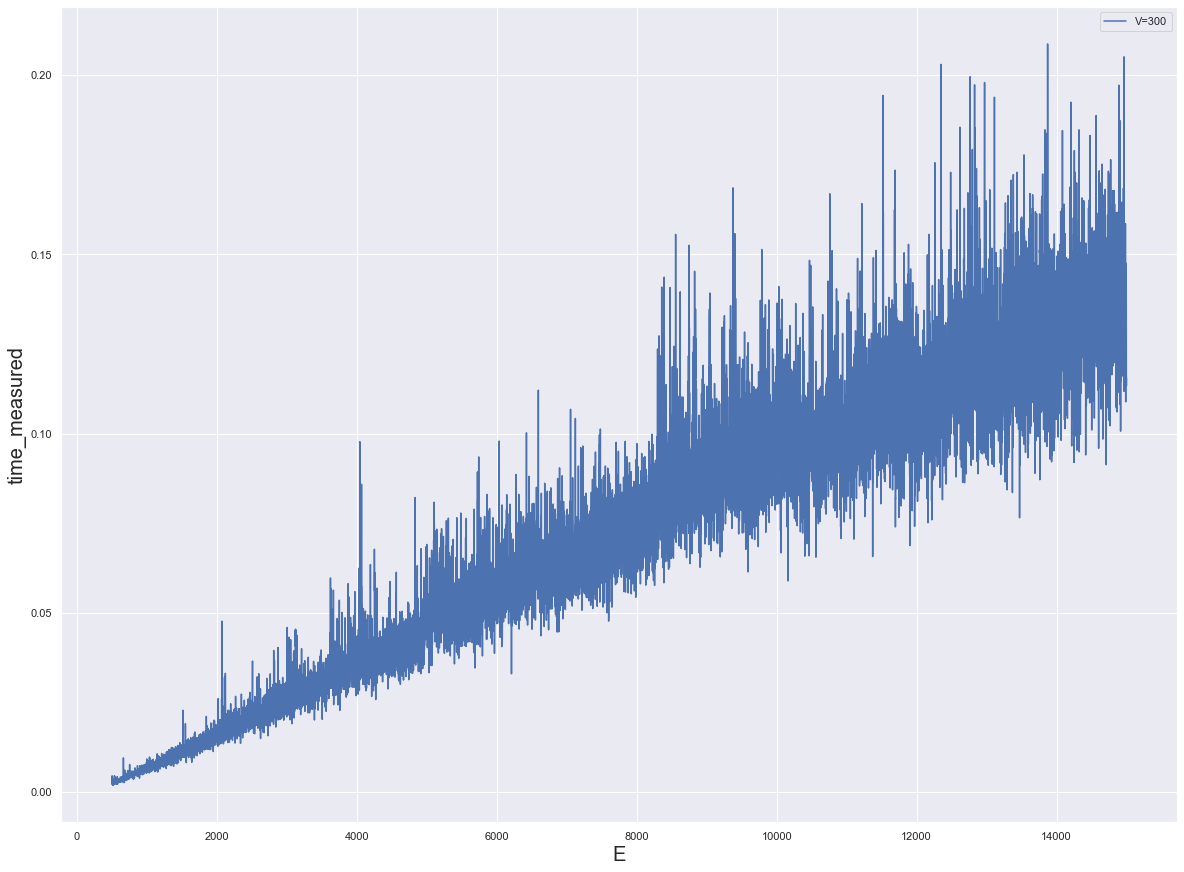

In [122]:
sns.lineplot(x="E",y="time_measured",data=procesed3,label=f"V={procesed3.iloc[0,:].V}")


<AxesSubplot:xlabel='V', ylabel='time_measured'>

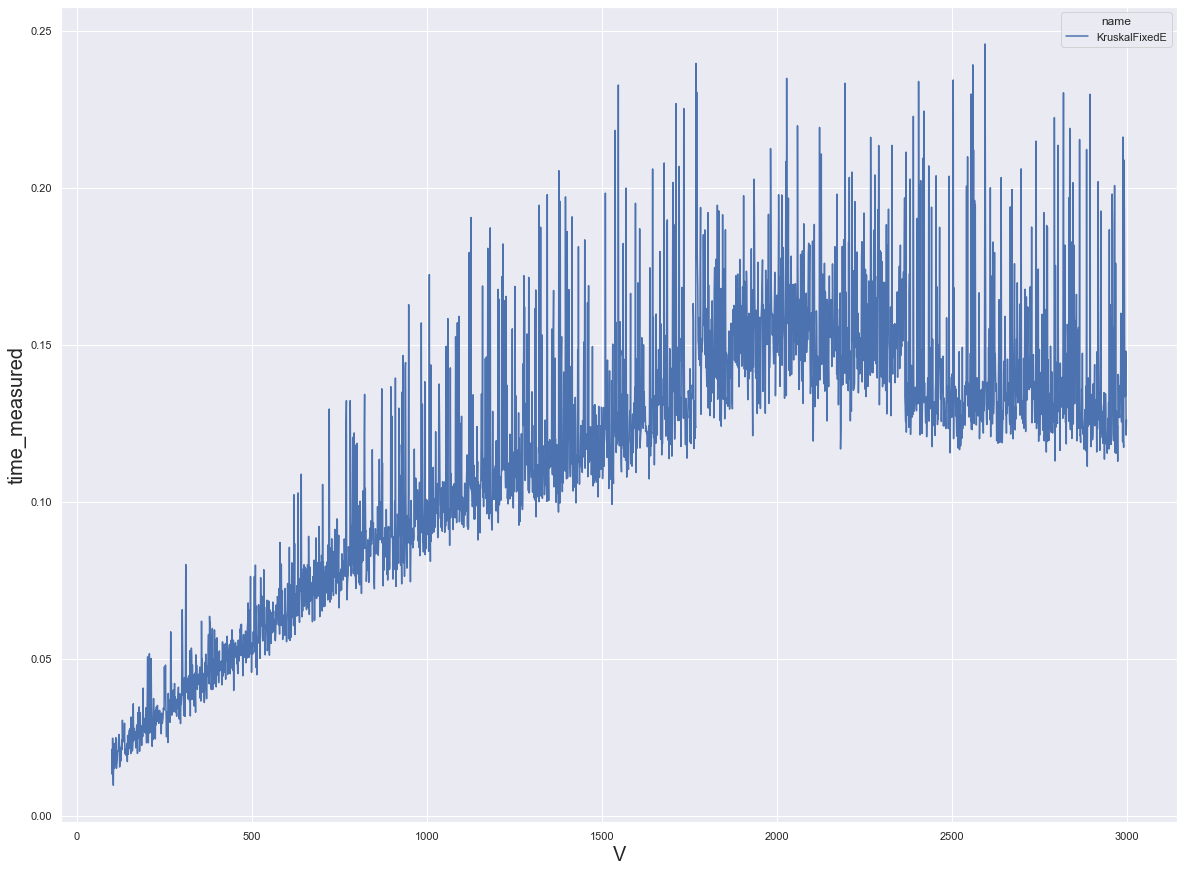

In [9]:
sns.lineplot(x="V",y="time_measured",hue="name",data=procesed4)